#TER ÉTAPE 6

In [1]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, accuracy_score
import math
import numpy as np

#  1 - CLASSIFICATION 
DATASET : phone prices

---

In [2]:
bd = pd.read_csv("/Users/leolamoureux/FAC/TER/projet_TER_machine_learning/Datasets/phone_price.csv")
algo = RandomForestClassifier(max_depth=25, max_leaf_nodes=200, max_samples=0.8, n_estimators=200)

In [3]:
LAB = bd.sample(frac = 0.1,random_state=5)
bd.drop(index=LAB.iloc[:, :].index.tolist(), inplace=True)
target_lab = LAB['price_range']
LAB.drop('price_range',axis=1,inplace=True)

TEST = bd.sample(frac = 0.15,random_state=5)
bd.drop(index=TEST.iloc[:, :].index.tolist(), inplace=True)
target_test = TEST['price_range']
TEST.drop('price_range', axis = 1, inplace = True)

In [4]:
def prepare(i):
    non_lab = bd.sample(frac = i,random_state=int(i*10))
    target_non_lab = non_lab['price_range']
    non_lab.drop('price_range', axis = 1, inplace = True)
    return non_lab, target_non_lab

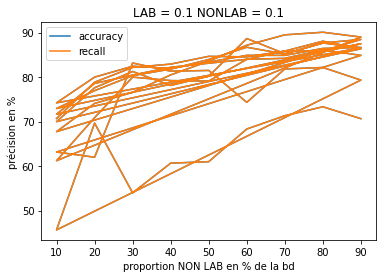

In [5]:
from sklearn.semi_supervised import SelfTrainingClassifier
self_training_model = SelfTrainingClassifier(algo, max_iter=None, k_best=10)
tailles = [0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
accuracy_values = []
recall_values = []
proportions = []

for t in tailles:
    bd = pd.read_csv("/Users/leolamoureux/FAC/TER/projet_TER_machine_learning/Datasets/phone_price.csv")
    LAB = bd.sample(frac = t,random_state=5)
    bd.drop(index=LAB.iloc[:, :].index.tolist(), inplace=True)
    target_lab = LAB['price_range']
    LAB.drop('price_range',axis=1,inplace=True)

    TEST = bd.sample(frac = 0.15,random_state=5)
    bd.drop(index=TEST.iloc[:, :].index.tolist(), inplace=True)
    target_test = TEST['price_range']
    TEST.drop('price_range', axis = 1, inplace = True)
    for i in tailles:
        NON_LAB, target_non_lab = prepare(i)
        proportions.append(NON_LAB.shape[0]/bd.shape[0]*100)
        accuracy = []
        recall = []
        for j in range(10):
            self_training_model.fit(NON_LAB, target_non_lab)
            accuracy.append(accuracy_score(target_test,self_training_model.predict(TEST)))
            recall.append(recall_score(target_test,self_training_model.predict(TEST),average='micro'))
        accuracy_values.append(statistics.mean(accuracy)*100)
        recall_values.append(statistics.mean(recall)*100)

plt.title(f"LAB = {t} NONLAB = {i}")
plt.xlabel("proportion NON LAB en % de la bd")
plt.ylabel("précision en %")
plt.plot(proportions,accuracy_values,label="accuracy")
plt.plot(proportions,recall_values,label="recall")
plt.legend()
plt.show()

#les 2 courbes se superposent parfaitement donc on ne voit que le recall